In [1]:
from dd_class import Dragodinde
from dd_class import Elevage
import random

In [2]:
# Define the structure for each object
class LinkGeneration:
    def __init__(self, color, generation, next_colors):
        self.color = color
        self.generation = generation
        self.next_colors = next_colors

    def __repr__(self):
        return f"color:{self.color}, generation:{self.generation}, next_colors:{self.next_colors})"

    # Getter for color
    def get_color(self):
        return self.color

    # Getter for generation
    def get_generation(self):
        return self.generation

    # Getter for next_colors
    def get_ancestor(self):
        return self.next_colors
    
# Define the list of objects (example data)
color_generation_list = [
    [
        LinkGeneration("Dorée", 1, []),
        LinkGeneration("Amande", 1, []),
        LinkGeneration("Rousse", 1, [])
    ],[
        LinkGeneration("Rousse et Amande", 2, ["Amande", "Rousse"]),
        LinkGeneration("Amande et Dorée", 2, ["Amande", "Dorée"]),
        LinkGeneration("Rousse et Dorée", 2, ["Dorée", "Rousse"])
    ],[
        LinkGeneration("Indigo", 3, ["Amande et Dorée", "Rousse et Amande"]),
        LinkGeneration("Ebène", 3, ["Amande et Dorée", "Rousse et Dorée"])
    ],[
        LinkGeneration("Indigo et Ebène", 4, ["Ebène", "Indigo"]),
    ],[
        LinkGeneration("Pourpre", 5, ["Rousse et Amande", "Indigo et Ebène"]),
        LinkGeneration("Orchidée", 5, ["Rousse et Dorée", "Indigo et Ebène"])
    ],[
        LinkGeneration("Ebène et Orchidée", 6, ["Ebène", "Orchidée"]),
        LinkGeneration("Pourpre et Orchidée", 6, ["Orchidée", "Pourpre"]),
        LinkGeneration("Indigo et Pourpre", 6, ["Indigo", "Pourpre"])
    ],[
        LinkGeneration("Ivoire", 7, ["Pourpre et Orchidée", "Indigo et Pourpre"]),
        LinkGeneration("Turquoise", 7, ["Ebène et Orchidée", "Pourpre et Orchidée"])
    ],[
        LinkGeneration("Turquoise et Orchidée", 8, ["Turquoise", "Orchidée"]),
        LinkGeneration("Ivoire et Turquoise", 8, ["Ivoire", "Turquoise"]),
        LinkGeneration("Pourpre et Ivoire", 8, ["Ivoire", "Pourpre"])
    ],[
        LinkGeneration("Emeraude", 9, ["Pourpre et Ivoire", "Ivoire et Turquoise"]),
        LinkGeneration("Prune", 9, ["Turquoise et Orchidée", "Ivoire et Turquoise"])
    ],[
        LinkGeneration("Prune et Emeraude", 10, ["Emeraude", "Prune"])
    ]
]

class Models :
    def __init__(self) :
        self.elevage = self.create_elevage()
        self.interred_dd = color_generation_list

    def __str__(self) :
        return (f"{self.elevage}")
    
    def get_length_elevage(self) :
        return len(self.elevage.get_dragodindes())
    
    def get_better_generation(self) :
        better_generation = 1
        for dragodinde in self.elevage.get_dragodindes() :
            generation = dragodinde.get_generation()
            if generation > better_generation :
                better_generation = generation
        
        return better_generation

    def get_dd_better_generation(self, dragodindes) :
        better_generation = 1
        list_better_dd = []
        for idx, dragodinde in enumerate(dragodindes) :
            generation  = dragodinde.get_generation()
            if generation > better_generation :
                list_better_dd = []
                better_generation = generation
                list_better_dd.append(dragodindes[idx])
            elif generation == better_generation :
                list_better_dd.append(dragodindes[idx])

        return list_better_dd

    def create_elevage(self):

        dragodindes_data = [

            (1, "M", "Rousse", 1),
            (2, "F", "Rousse", 1),
            (3, "F", "Rousse", 1),
            (4, "M", "Rousse", 1),
            (5, "F", "Rousse", 1),
            (6, "M", "Rousse", 1),

            (1, "M", "Rousse", 1),
            (2, "F", "Rousse", 1),
            (3, "F", "Rousse", 1),
            (4, "M", "Rousse", 1),
            (5, "F", "Rousse", 1),
            (6, "M", "Rousse", 1),

            (7, "F", "Amande", 1),
            (8, "M", "Amande", 1),
            (9, "M", "Amande", 1),
            (10, "F", "Amande", 1),
            (11, "M", "Amande", 1),
            (12, "F", "Amande", 1),

            (7, "F", "Amande", 1),
            (8, "M", "Amande", 1),
            (9, "M", "Amande", 1),
            (10, "F", "Amande", 1),
            (11, "M", "Amande", 1),
            (12, "F", "Amande", 1),

            (13, "M", "Dorée", 1),
            (14, "F", "Dorée", 1),
            (15, "M", "Dorée", 1),
            (16, "M", "Dorée", 1),
            (17, "F", "Dorée", 1),
            (18, "F", "Dorée", 1),
            
            (13, "M", "Dorée", 1),
            (14, "F", "Dorée", 1),
            (15, "M", "Dorée", 1),
            (16, "M", "Dorée", 1),
            (17, "F", "Dorée", 1),
            (18, "F", "Dorée", 1)
        ]

        list_dd = []
        for id, gender, color, generation in dragodindes_data:
            dragodinde = Dragodinde(id, gender, color, generation)
            list_dd.append(dragodinde)

        return Elevage(list_dd)
    
    def strategy_random_crosing(self):
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")

        male = random.choice(males)
        female = random.choice(females)

        # Assuming breeding is a method that performs crossing and returns probabilities
        list_new_dd, _ = self.elevage.breeding(male, female)
        generations = [dd.get_generation() for dd in list_new_dd]
        return max(generations)
    
    def strategy_crosing_better_gen(self):
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")

        # Take the best generation
        list_better_males = self.get_dd_better_generation(males)
        list_better_females = self.get_dd_better_generation(females)

        if list_better_males[0].get_generation() > list_better_females[0].get_generation():
            male = random.choice(males)
            female = random.choice(list_better_females)
        
        elif list_better_males[0].get_generation() <= list_better_females[0].get_generation():
            male = random.choice(list_better_males)
            female = random.choice(females)

        list_new_dd, _ = self.elevage.breeding(male, female)
        generations = [dd.get_generation() for dd in list_new_dd]
        return max(generations)

    def is_in_every_sublist(self, lst, target):
        for item in lst:
            if isinstance(item.get_color(), list):
                if not self.is_in_every_sublist(item.get_color(), target):  # Recursively check sublists
                    return False
            elif item.get_color() != target:
                return False
        return True
    
    # dict of quality of purety of a list of dd
    def purity_score(self, list_dd: list) -> dict:
        """
        List the quality of purity for a list of dd.
        """
        # Initialize a dictionary to hold lists of dd objects for each purity level
        purity_scores = {}
        purity_level = 3

        for dd in list_dd:
            color_ind = dd.get_color()  # The color to match for purity
            match_count = 0  # Count of matching levels

            for level in range(purity_level):
                color_genealogy = dd.get_arbre_genealogique().get_genealogie(level)  # List of nodes at this level

                # If there is no genealogy data for this level, skip to the next level
                if not color_genealogy:
                    continue

                # Calculate the purity for this level by checking if all colors match `color_ind`
                if all(c == color_ind for c in color_genealogy):
                    match_count += len(color_genealogy)  # Increment by the length of the genealogy list

            # Determine the total number of color checks performed
            total_checks = sum(len(dd.get_arbre_genealogique().get_genealogie(level)) for level in range(purity_level))
            
            # Calculate purity percentage; avoid division by zero
            if total_checks > 0:
                purity_percentage = (match_count / total_checks) * 100
            else:
                purity_percentage = 0

            # Store the calculated purity percentage for this dd
            purity_scores[dd] = purity_percentage

        return purity_scores

    def find_most_advanced_unpure_dd(self, unpur_scores, purity_threshold) -> object:
        
        # Filter out dd objects that are purity_threshold % pure
        unpure_dds = {dd: score for dd, score in unpur_scores.items() if score < purity_threshold}
        
        if not unpure_dds :
            print("unpur_scores : ", [dd.get_color() for dd in unpure_dds])
            raise ValueError("No unpur dd are find in find_most_advanced_unpure_dd()")

        # Find the dd with the highest purity score (most pure)
        return max(unpure_dds, key=unpure_dds.get)

    def identify_crosing(self, males, females, purity_threshold):
        target_generation = 9  # The final generation we want to archieve (10th generation)

        color_males = [dd.get_color() for dd in males]
        color_females = [dd.get_color() for dd in females]

        males_purity_score = self.purity_score(males)  # dict: purity score (% of purification)
        females_purity_score = self.purity_score(females)

        pure_males = [dd for dd, purity in males_purity_score.items() if purity >= purity_threshold] 
        pure_females = [dd for dd, purity in females_purity_score.items() if purity >= purity_threshold]
        
        color_pure_males = [dd.get_color() for dd in pure_males]
        color_pure_females = [dd.get_color() for dd in pure_females]
        saved_ancestor_color = {"M" : [], "F" : []}

        # Start by checking from the last generation that needs to be achieved
        for gen in range(target_generation, 0, -1):

            # Loop over the interested dd to check if there are all of them to create new dd
            if gen % 2 == 0 :
                bool_interested_dd_all_present = [True] * 2
            else : 
                bool_interested_dd_all_present = [True] * 3

            for idx, interested_dd in enumerate(self.interred_dd[gen]) :
                interested_dd_color = interested_dd.get_color()
                
                # Check if in the next generation there are not male & female already existing for this interested_dd
                if interested_dd_color in color_pure_males :
                    saved_ancestor_color["M"].append(interested_dd_color)

                if interested_dd_color in color_pure_females :
                    saved_ancestor_color["F"].append(interested_dd_color)
                
                # Check if both ancestor_color M and F are in the same color (pass though)
                if interested_dd_color in saved_ancestor_color["M"] and interested_dd_color in saved_ancestor_color["F"] :
                    bool_interested_dd_all_present[idx] = False
                    continue

                # Case : interrested dd not pur or next generation are already pur
                if ((interested_dd_color not in color_pure_males or interested_dd_color not in color_pure_females) \
                    or (interested_dd_color in saved_ancestor_color["M"] and interested_dd_color in saved_ancestor_color["F"])) \
                    and (interested_dd_color in color_males and interested_dd_color in color_females) :

                    # Lock this color to not be recreated
                    bool_interested_dd_all_present[idx] = False

                    # Case : can be purify
                    if interested_dd_color in color_males and interested_dd_color in color_females :
                        males_interred_unpur = [male for male, color in zip(males, color_males) if color == interested_dd_color]
                        females_interred_unpur = [female for female, color in zip(females, color_females) if color == interested_dd_color]
                        males_interred_unpur_score = self.purity_score(males_interred_unpur)
                        females_interred_unpur_score = self.purity_score(females_interred_unpur)

                        # Find the most advanced pure dd for males and females using the helper function
                        most_advanced_pure_male = self.find_most_advanced_unpure_dd(males_interred_unpur_score, purity_threshold)
                        most_advanced_pure_female = self.find_most_advanced_unpure_dd(females_interred_unpur_score, purity_threshold)

                        # Return the most advanced pure male and female if found, otherwise handle the case
                        if most_advanced_pure_male and most_advanced_pure_female:
                            return most_advanced_pure_male, most_advanced_pure_female

            # Case : generation are not present but the ancestor are pure and we can create new generation
            for bool_interested, interested_dd in zip(bool_interested_dd_all_present, self.interred_dd[gen]) :
                ancestor_interested_dd = interested_dd.get_ancestor()

                if bool_interested and (all(elem in color_pure_males for elem in ancestor_interested_dd) and all(elem in color_pure_females for elem in ancestor_interested_dd)) :

                    # TODO : change cause caca 
                    if random.random() < 0.5:
                        return pure_males[color_pure_males.index(ancestor_interested_dd[0])], pure_females[color_pure_females.index(ancestor_interested_dd[1])]
                    else:
                        return pure_males[color_pure_males.index(ancestor_interested_dd[1])], pure_females[color_pure_females.index(ancestor_interested_dd[0])]

        #print("pure_males : ", color_pure_males)
        #print("pure_females : ", color_pure_females)
        raise ValueError("Too bad you kill all your 1st generation")

    def strategy_select_and_purify(self, purity_threshold) :
        # Intuition :
        # Identify dd that need to be crossed to create a 10th-generation dd
        # Identify dd that need to be purified (while the n-1 generation dd is available)
        # Purify and lock the selected dd (M and F)
        # While a selected dd is identified (color) and gen n - 1 is purified
        # Do crossing / purification step

        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        # Identify dd that need to be created of purify
        male, female = self.identify_crosing(males, females, purity_threshold)
        #print("male, female : ", male.get_color(), female.get_color(), male.get_id(), female.get_id())

        # Crossing each other
        list_new_dd, _ = self.elevage.breeding(male, female)
        #print("new born : ", list_new_dd[0].get_color(), list_new_dd[0].get_sex())
        generations = [dd.get_generation() for dd in list_new_dd]
        return max(generations)

In [3]:
import matplotlib.pyplot as plt
 
def plot_simlation(list_simulation) : 
    x_values = list(range(len(list_simulation)))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plotting the two lists
    plt.plot(x_values, list_simulation, label='Generation List', color='blue')
    plt.ylim(0, 11)

    # Adding labels and title
    plt.xlabel('Number of Croisement')
    plt.ylabel('Generation Number')
    plt.title('Plot of Generation Numbers per Croisement')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

## Model 1 : random crosing

In [9]:
elevage = Models()
list_random = [1]
better_generation = 1
crosing_number = 1000
for i in range(crosing_number) :
    generation = elevage.strategy_random_crosing()
    if generation > better_generation :
        better_generation = generation
    list_random.append(better_generation)
    if generation == 10 :
        break

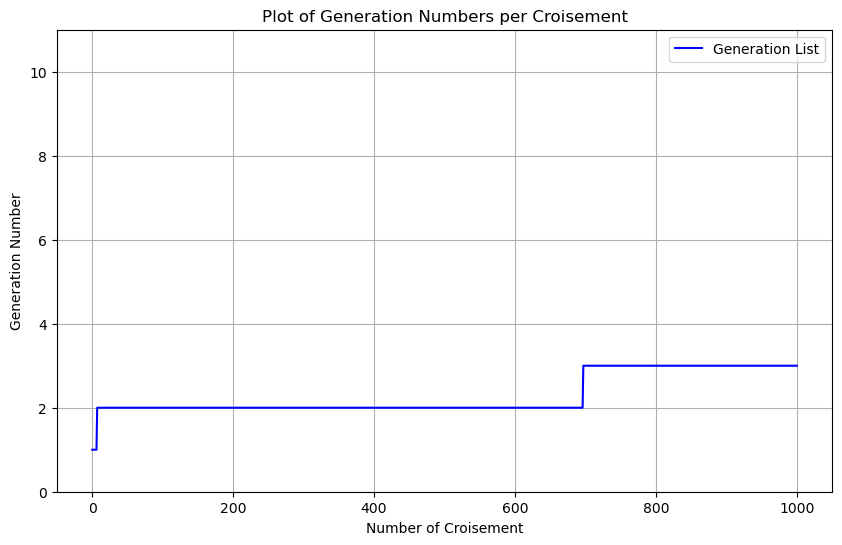

In [10]:
plot_simlation(list_random) 

## Model 2 : Best generation crosing

In [11]:
elevage = Models()
better_generation = 1
list_gen_upgrade_random = [1]
crosing_number = 1000
for i in range(crosing_number) :
    generation = elevage.strategy_crosing_better_gen()
    if generation > better_generation :
        better_generation = generation
    list_gen_upgrade_random.append(better_generation)

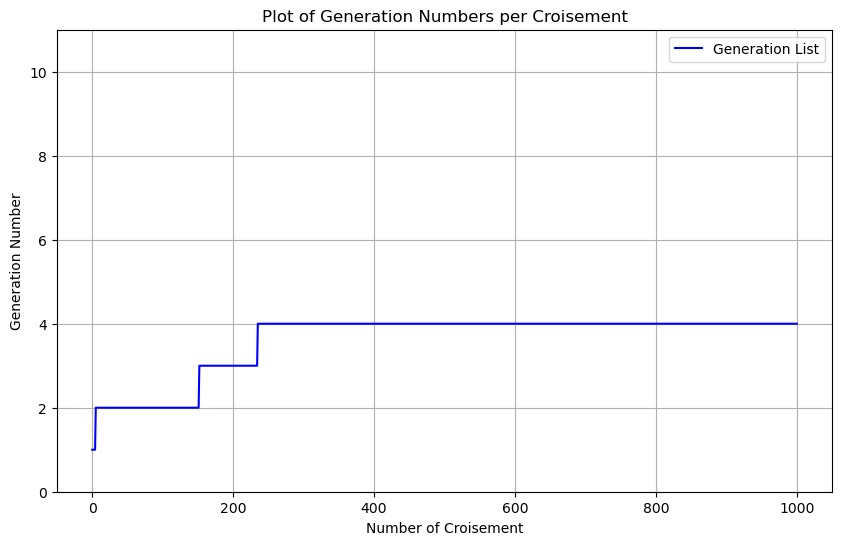

In [12]:
plot_simlation(list_gen_upgrade_random) 

## Model 3 : Select and purify crosing

### Model strategy select and purify pur 100

In [24]:
elevage = Models()
purity_threshold = 100
better_generation = 1
list_select_purify = [1]
crosing_number = 2000
for i in range(crosing_number) :
    generation = elevage.strategy_select_and_purify(purity_threshold)
    if generation > better_generation :
        better_generation = generation
    list_select_purify.append(better_generation)
    if generation == 10 :
        break

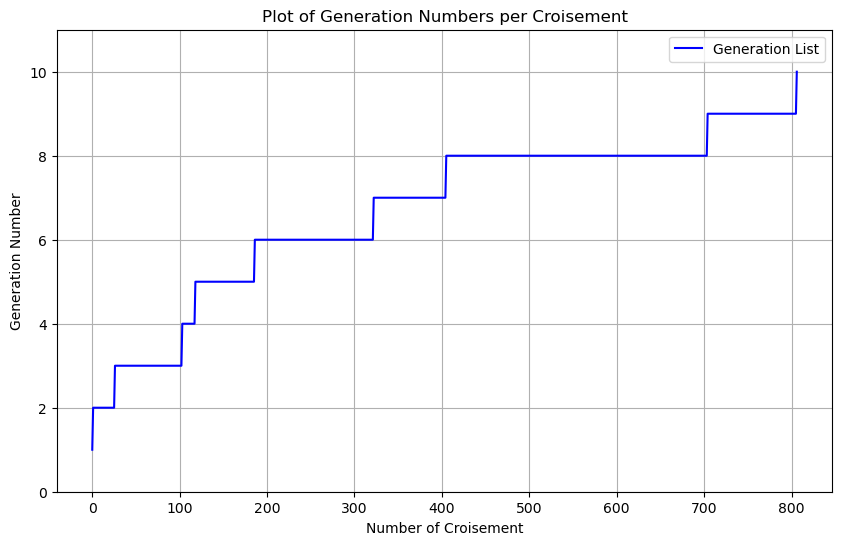

In [25]:
plot_simlation(list_select_purify)

In [26]:
elevage = Models()
purity_threshold = 75
better_generation = 1
list_select_purify = [1]
crosing_number = 2000
for i in range(crosing_number) :
    generation = elevage.strategy_select_and_purify(purity_threshold)
    if generation > better_generation :
        better_generation = generation
    list_select_purify.append(better_generation)
    if generation == 10 :
        break

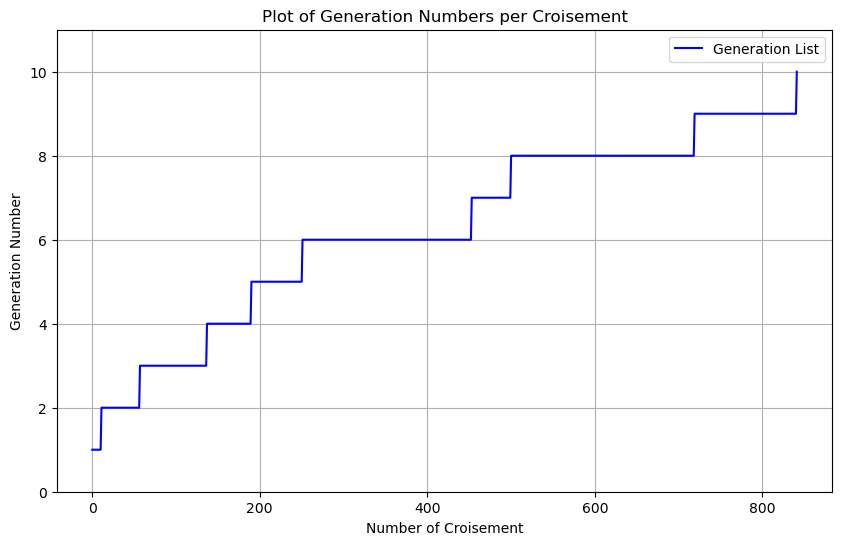

In [27]:
plot_simlation(list_select_purify)

In [28]:
elevage = Models()
purity_threshold = 50
better_generation = 1
list_select_purify = [1]
crosing_number = 2000
for i in range(crosing_number) :
    generation = elevage.strategy_select_and_purify(purity_threshold)
    if generation > better_generation :
        better_generation = generation
    list_select_purify.append(better_generation)
    if generation == 10 :
        break

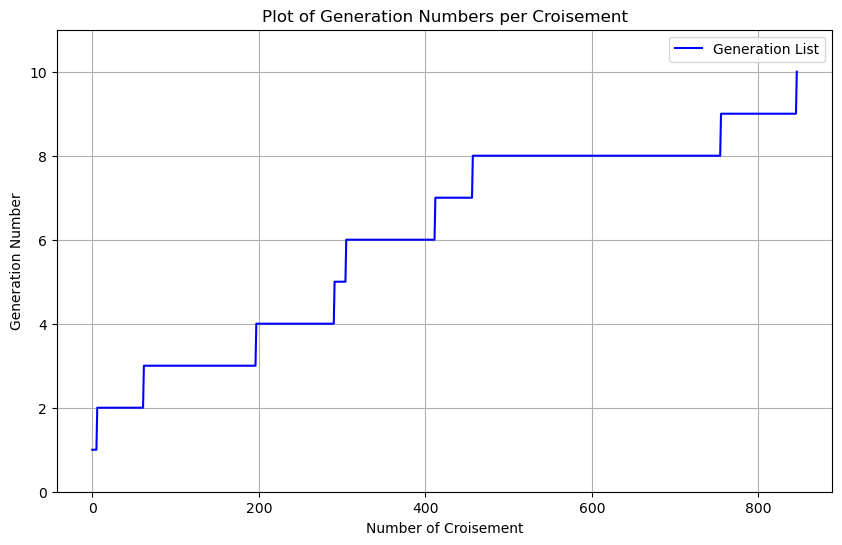

In [18]:
plot_simlation(list_select_purify)

In [36]:
elevage = Models()
purity_threshold = 25
better_generation = 1
list_select_purify = [1]
crosing_number = 2000
for i in range(crosing_number) :
    generation = elevage.strategy_select_and_purify(purity_threshold)
    if generation > better_generation :
        better_generation = generation
    list_select_purify.append(better_generation)
    if generation == 10 :
        break

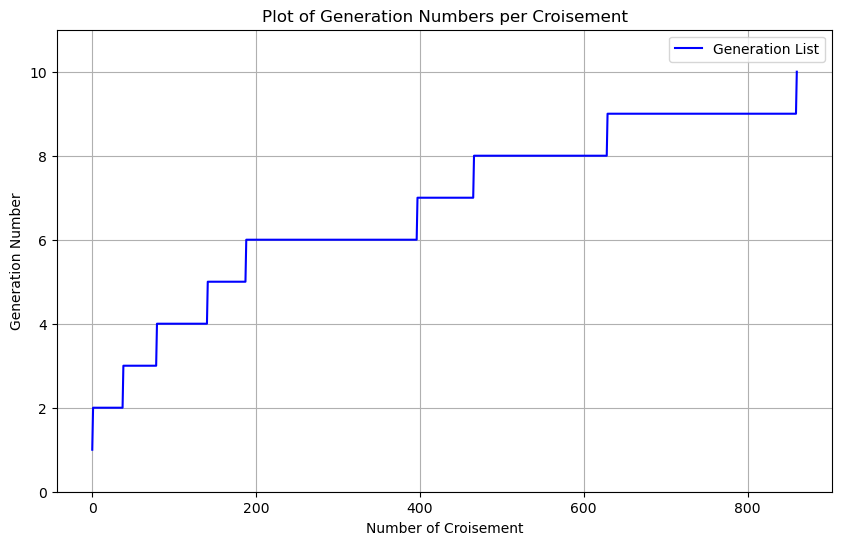

In [37]:
plot_simlation(list_select_purify)

In [4]:
list_simulation_random = []

for i in range(100) :
    elevage = Models()
    list_gen_upgrade_random = [1]
    crosing_number = 2000
    better_generation = 1
    for i in range(crosing_number) :
        generation = elevage.strategy_random_crosing()
        if generation > better_generation :
            better_generation = generation
        list_gen_upgrade_random.append(better_generation)
    list_simulation_random.append(list_gen_upgrade_random)

In [6]:
list_simulation_better_gen = []

for i in range(100) :
    elevage = Models()
    list_gen_upgrade_random = [1]
    crosing_number = 2000
    better_generation = 1
    for i in range(crosing_number) :
        generation = elevage.strategy_crosing_better_gen()
        if generation > better_generation :
            better_generation = generation
        list_gen_upgrade_random.append(better_generation)
        if generation == 10 :
            break
    list_simulation_better_gen.append(list_gen_upgrade_random)

In [22]:
list_simulation_select_purify_100 = []

for i in range(10) :
    elevage = Models()
    list_gen_upgrade_random = [1]
    crosing_number = 2000
    better_generation = 1
    purity_threshold = 100
    for i in range(crosing_number) :
        try :
            generation = elevage.strategy_select_and_purify(purity_threshold)
            if generation > better_generation :
                better_generation = generation
            list_gen_upgrade_random.append(better_generation)
            if generation == 10 :
                break
        except :
            continue
    list_simulation_select_purify_100.append(list_gen_upgrade_random)

In [25]:
import multiprocessing

# Define the function to run for each iteration
def simulate_select_and_purify(_):
    elevage = Models()
    list_gen_upgrade_random = [1]
    crosing_number = 2000
    better_generation = 1
    purity_threshold = 100
    for i in range(crosing_number):
        generation = elevage.strategy_select_and_purify(purity_threshold)
        if generation > better_generation:
            better_generation = generation
        list_gen_upgrade_random.append(better_generation)
        if generation == 10:
            break
    return list_gen_upgrade_random

# Use multiprocessing Pool to parallelize the loop
if __name__ == "__main__":
    with multiprocessing.Pool() as pool:
        list_simulation_select_purify_100 = pool.map(simulate_select_and_purify, range(100))

Process SpawnPoolWorker-39:
Traceback (most recent call last):
Process SpawnPoolWorker-40:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/anaconda3/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'simulate_select_and_purify' on <module '__main__' (built-in)>
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib

KeyboardInterrupt: 

In [10]:
list_simulation_select_purify_75 = []

for i in range(100) :
    elevage = Models()
    list_gen_upgrade_random = [1]
    crosing_number = 2000
    better_generation = 1
    purity_threshold = 75
    for i in range(crosing_number) :
        try :
            generation = elevage.strategy_select_and_purify(purity_threshold)
            if generation > better_generation :
                better_generation = generation
            list_gen_upgrade_random.append(better_generation)
            if generation == 10 :
                break
        except :
            continue
    list_simulation_select_purify_75.append(list_gen_upgrade_random)

In [11]:
list_simulation_select_purify_50 = []

for i in range(100) :
    elevage = Models()
    list_gen_upgrade_random = [1]
    crosing_number = 2000
    better_generation = 1
    purity_threshold = 50
    for i in range(crosing_number) :
        try :
            generation = elevage.strategy_select_and_purify(purity_threshold)
            if generation > better_generation :
                better_generation = generation
            list_gen_upgrade_random.append(better_generation)
            if generation == 10 :
                break
        except :
            continue
    list_simulation_select_purify_50.append(list_gen_upgrade_random)

In [16]:
print(len(list_simulation_select_purify_75))
print(len(list_simulation_select_purify_50))

100
100


In [12]:
def pad_list_of_lists(list_of_lists):
    # Find the maximum length of sub-lists
    max_length = 2001
    
    # Pad each sub-list to have the maximum length
    padded_list_of_lists = []
    for sub_list in list_of_lists:
        length = len(sub_list)
        if length < max_length:
            # Pad the sub-list with the last element until it reaches max_length
            sub_list.extend([sub_list[-1]] * (max_length - length))
        padded_list_of_lists.append(sub_list)
    
    return padded_list_of_lists

In [13]:
list_simulation_select_purify_100_2 = pad_list_of_lists(list_simulation_select_purify_100)
list_simulation_select_purify_75_2 = pad_list_of_lists(list_simulation_select_purify_75)
list_simulation_select_purify_50_2 = pad_list_of_lists(list_simulation_select_purify_50)

In [14]:
import matplotlib.pyplot as plt
import numpy as np

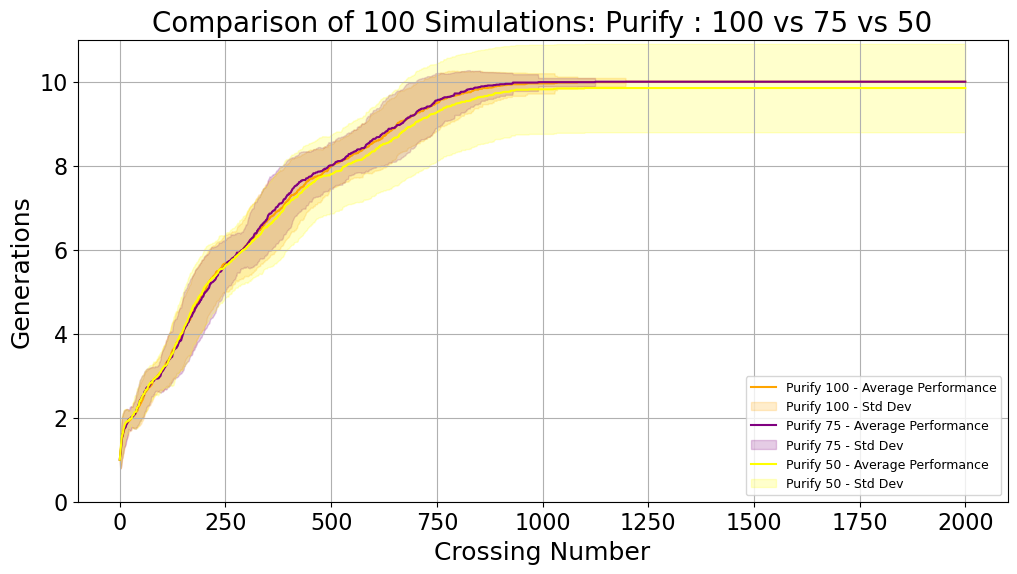

In [19]:
crosing_number = 2000

# Convert both to numpy arrays for easy aggregation
simulation_random_array = np.array(list_simulation_select_purify_100_2)
simulation_better_gen_array = np.array(list_simulation_select_purify_75_2)
simulation_select_purify_array = np.array(list_simulation_select_purify_50_2)

# Calculate mean and standard deviation across simulations for both models
mean_performance_random = np.mean(simulation_random_array, axis=0)
std_performance_random = np.std(simulation_random_array, axis=0)

mean_performance_better_gen = np.mean(simulation_better_gen_array, axis=0)
std_performance_better_gen = np.std(simulation_better_gen_array, axis=0)

mean_performance_select_purify = np.mean(simulation_select_purify_array, axis=0)
std_performance_select_purify = np.std(simulation_select_purify_array, axis=0)

# Set global font sizes
plt.rcParams.update({
    'font.size': 16,          # Increase font size for all text
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # X and Y label font size
    'xtick.labelsize': 16,    # X-axis tick label font size
    'ytick.labelsize': 16,    # Y-axis tick label font size
    'legend.fontsize': 9,    # Legend font size
    'figure.figsize': (14, 10)  # Increase the figure size
})

# Plotting the results
plt.figure(figsize=(12, 6))  # Increase the figure size

# Plot for Random Crossing model
plt.plot(mean_performance_random, label='Purify 100 - Average Performance', color='orange')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_random - std_performance_random, 
                 mean_performance_random + std_performance_random, 
                 color='orange', alpha=0.2, label='Purify 100 - Std Dev')

# Plot for Other model
plt.plot(mean_performance_better_gen, label='Purify 75 - Average Performance', color='purple')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_better_gen - std_performance_better_gen, 
                 mean_performance_better_gen + std_performance_better_gen, 
                 color='purple', alpha=0.2, label='Purify 75 - Std Dev')

# Plot for Other model
plt.plot(mean_performance_select_purify, label='Purify 50 - Average Performance', color='yellow')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_select_purify - std_performance_select_purify, 
                 mean_performance_select_purify + std_performance_select_purify, 
                 color='yellow', alpha=0.2, label='Purify 50 - Std Dev')

# Customize the plot
plt.title('Comparison of 100 Simulations: Purify : 100 vs 75 vs 50')
plt.xlabel('Crossing Number')
plt.ylabel('Generations')
plt.ylim(0, 11)  # Set y-axis limits from 0 to 11
plt.legend()
plt.grid(True)
plt.show()

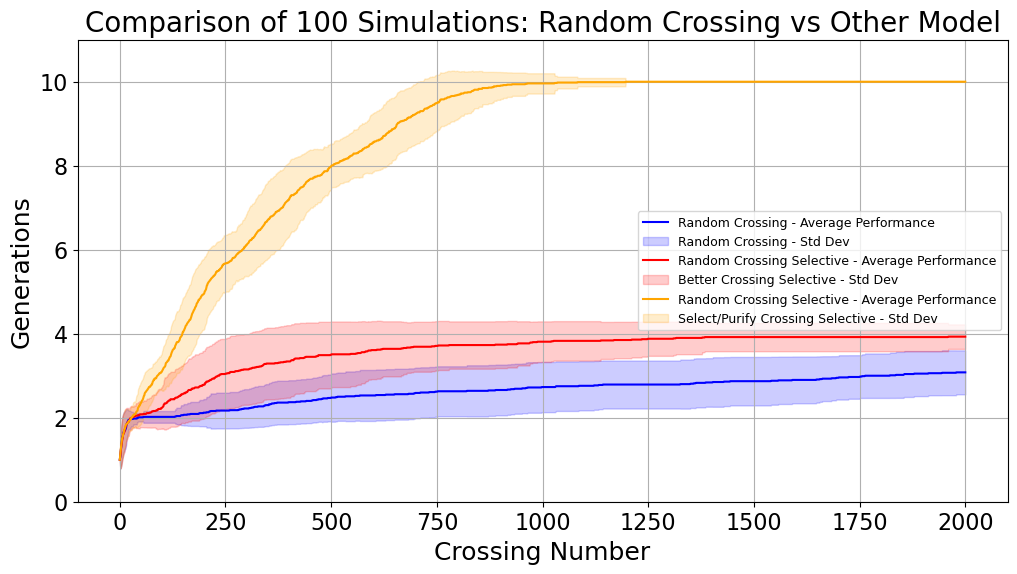

In [21]:
crosing_number = 2000

# Convert both to numpy arrays for easy aggregation
simulation_random_array = np.array(list_simulation_random)
simulation_better_gen_array = np.array(list_simulation_better_gen)
simulation_select_purify_array = np.array(list_simulation_select_purify_100_2)

# Calculate mean and standard deviation across simulations for both models
mean_performance_random = np.mean(simulation_random_array, axis=0)
std_performance_random = np.std(simulation_random_array, axis=0)

mean_performance_better_gen = np.mean(simulation_better_gen_array, axis=0)
std_performance_better_gen = np.std(simulation_better_gen_array, axis=0)

mean_performance_select_purify = np.mean(simulation_select_purify_array, axis=0)
std_performance_select_purify = np.std(simulation_select_purify_array, axis=0)

# Set global font sizes
plt.rcParams.update({
    'font.size': 16,          # Increase font size for all text
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # X and Y label font size
    'xtick.labelsize': 16,    # X-axis tick label font size
    'ytick.labelsize': 16,    # Y-axis tick label font size
    'legend.fontsize': 9,    # Legend font size
    'figure.figsize': (14, 10)  # Increase the figure size
})

# Plotting the results
plt.figure(figsize=(12, 6))  # Increase the figure size

# Plot for Random Crossing model
plt.plot(mean_performance_random, label='Random Crossing - Average Performance', color='blue')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_random - std_performance_random, 
                 mean_performance_random + std_performance_random, 
                 color='blue', alpha=0.2, label='Random Crossing - Std Dev')

# Plot for Other model
plt.plot(mean_performance_better_gen, label='Random Crossing Selective - Average Performance', color='red')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_better_gen - std_performance_better_gen, 
                 mean_performance_better_gen + std_performance_better_gen, 
                 color='red', alpha=0.2, label='Better Crossing Selective - Std Dev')

# Plot for Other model
plt.plot(mean_performance_select_purify, label='Random Crossing Selective - Average Performance', color='orange')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_select_purify - std_performance_select_purify, 
                 mean_performance_select_purify + std_performance_select_purify, 
                 color='orange', alpha=0.2, label='Select/Purify Crossing Selective - Std Dev')

# Customize the plot
plt.title('Comparison of 100 Simulations: Random Crossing vs Other Model')
plt.xlabel('Crossing Number')
plt.ylabel('Generations')
plt.ylim(0, 11)  # Set y-axis limits from 0 to 11
plt.legend()
plt.grid(True)
plt.show()